In [1]:
# IT17016476- R.Danuzon
#IT16088542 – H.K.Kuruppuarachchi
# Heart Diseases using Random Forest Classifier Algorithm
# Importing all required libraries to work with the dataset
import numpy as np # linear algebra
# Matplotlib library all types 2D graphs for dataset in python
import matplotlib.pyplot as plt 
# sklearn.metrics includes score functions, performance metrics and pairwise metrics and distance computations.
import sklearn.metrics as sm
# Using Panda library it able to get a dataframe with rows and columns out of the dataset
import pandas as pd
%matplotlib inline
# Read the dataset in the diabetes.csv file
data_with_dup = pd.read_csv("C:/Users/ASUS/Desktop/ML Assignment 2/heart.csv")

file_name_output = "heart_without_dupes.csv"
# Notes:
# - the `subset=None` means that every column is used 
#    to determine if two rows are different; to change that specify
#    the columns as an array
# - the `inplace=True` means that the data structure is changed and
#   the duplicate rows are gone  
data_with_dup.drop_duplicates(subset=None, inplace=True)

# Write the results to a different file
data_with_dup.to_csv(file_name_output)
data = pd.read_csv("C:/Users/ASUS/Desktop/ML Assignment 2/heart_without_dupes.csv")

In [2]:
# Display the data with coloumn
data_top = data.head()
# display 
data_top 

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
# Show the detailed information of each and every attributes of the dataset
data_attributes = data.describe().transpose()
# display
data_attributes


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,302.0,236.304636,188.588990,0.0,85.50,189.5,342.75,878.0
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0


In [4]:
# Check for existing null values
null_values = sum(data.isnull().sum())
print(null_values)

0


In [5]:
# count the number of zero values in each column
print((data[['age','trestbps','chol','thalach']] == 0).sum())

age         0
trestbps    0
chol        0
thalach     0
dtype: int64


In [6]:
data.target.value_counts()

1    164
0    138
Name: target, dtype: int64

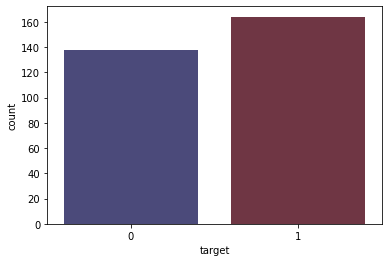

In [7]:
import seaborn as sns
sns.countplot(x="target", data=data, palette="icefire")
# Save a figure
plt.savefig('target.png')
plt.show()

In [8]:
NoofDisease = len(data[data.target == 0])
countofDisease = len(data[data.target == 1])
print("Percentage of Patients have no Heart Disease : {:.2f}%".format((NoofDisease / (len(data.target))*100)))
print("Percentage of Patients have Heart Disease : {:.2f}%".format((countofDisease / (len(data.target))*100)))

Percentage of Patients have no Heart Disease : 45.70%
Percentage of Patients have Heart Disease : 54.30%


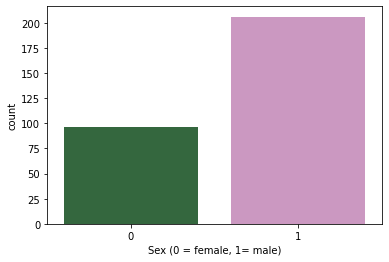

In [9]:
sns.countplot(x='sex', data=data, palette="cubehelix")
plt.xlabel("Sex (0 = female, 1= male)")
# Save a figure
plt.savefig('sex.png')
plt.show()

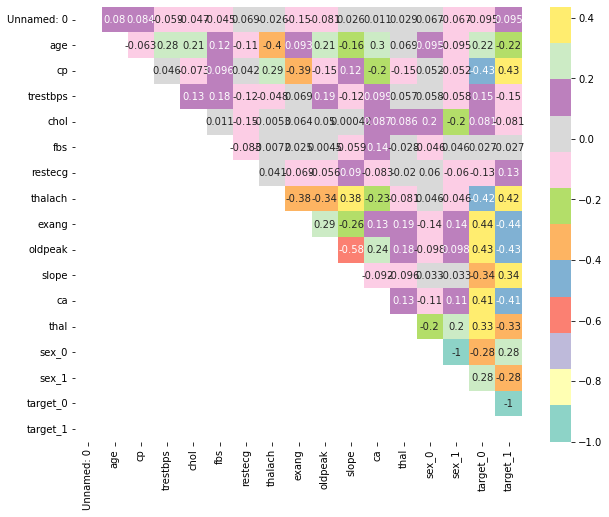

In [10]:
# convert strings to indicators (only numerics for correlation)
dumm = pd.get_dummies(data, columns=['sex', 'target']) 
corr = dumm.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            vmin=-1,
            cmap='Set3',
            annot=True,
            mask=np.tri(corr.shape[0], k=0))
# Save a figure
plt.savefig('sex_and_target_heatmap.png')
plt.show()

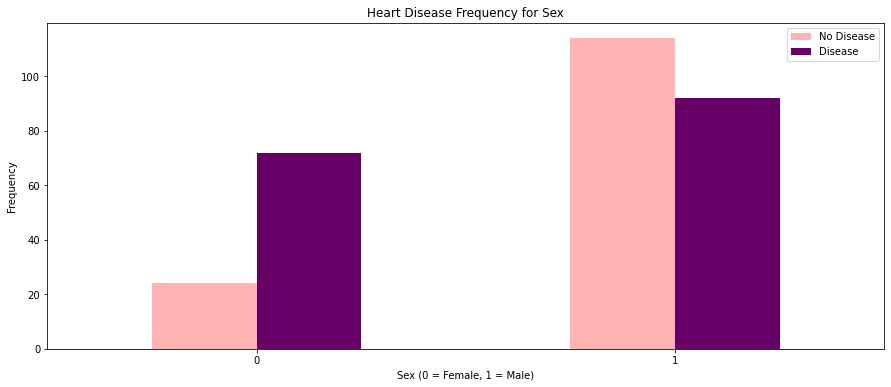

In [11]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(15,6),color=['#ffb3b3','#660066' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["No Disease", "Disease"])
plt.ylabel('Frequency')
# Save a figure
plt.savefig('sex_and_target_crosstab.png')
plt.show()

In [12]:
data.groupby('target').mean()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,,
0,216.797101,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.528986
1,252.719512,52.585366,0.560976,1.371951,129.250000,242.640244,0.140244,0.591463,158.378049,0.140244,0.586585,1.591463,0.341463,2.121951


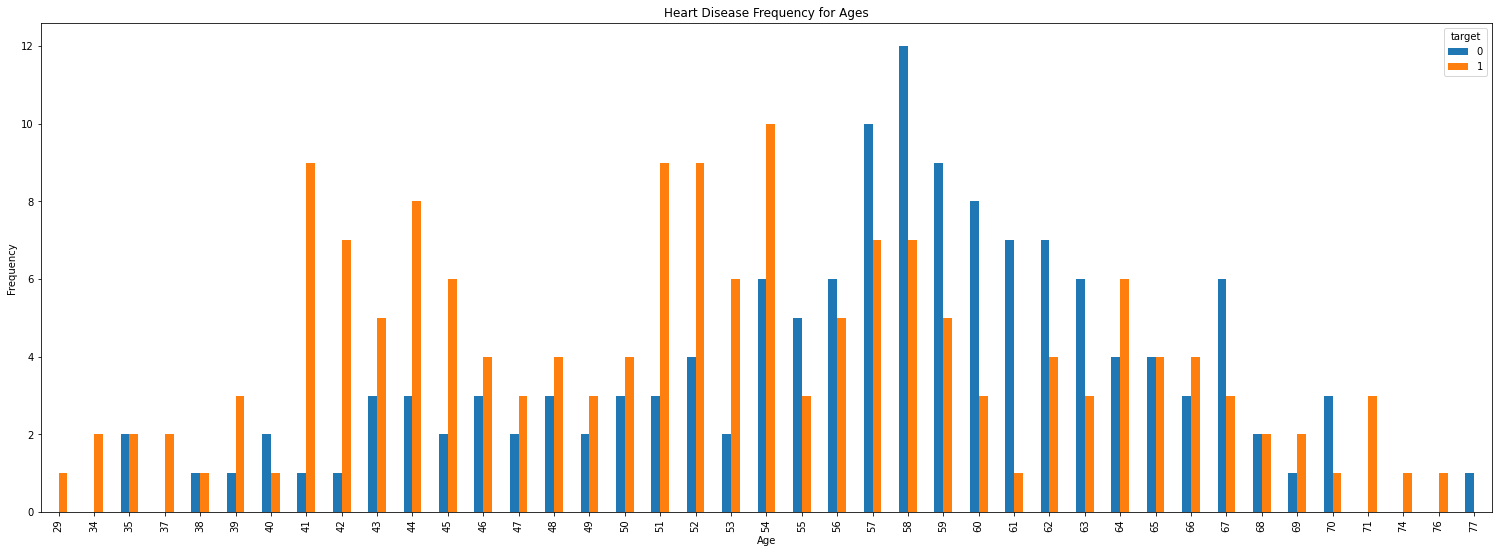

In [13]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(26,9))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
# Save a figure
plt.savefig('heart_disease_and_ages.png')
plt.show()

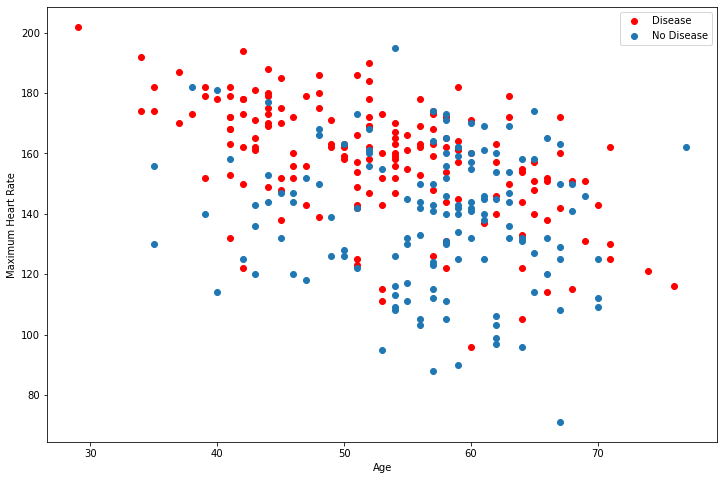

In [14]:
# Create a figure
plt.figure(figsize=(12,8))
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)], c="red")
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)])
plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
# Save a figure
plt.savefig('age_target_and_thalach_target_scatter.png')
plt.show()


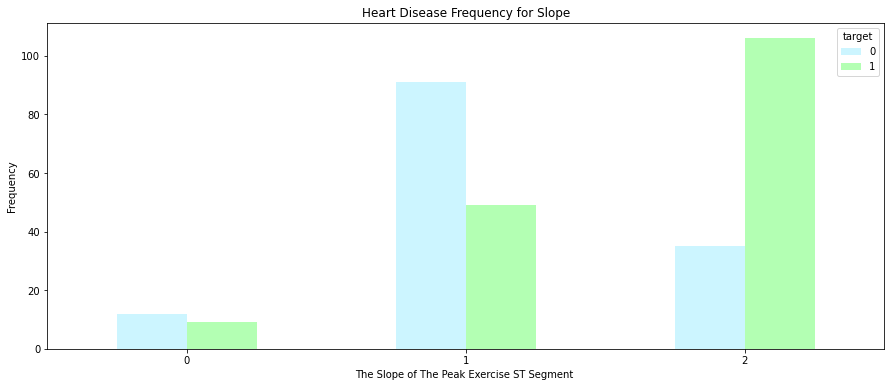

In [15]:
pd.crosstab(data.slope,data.target).plot(kind="bar",figsize=(15,6),color=['#ccf5ff','#b3ffb3' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
# Save a figure
plt.savefig('slop_and_target_crosstab.png')
plt.show()

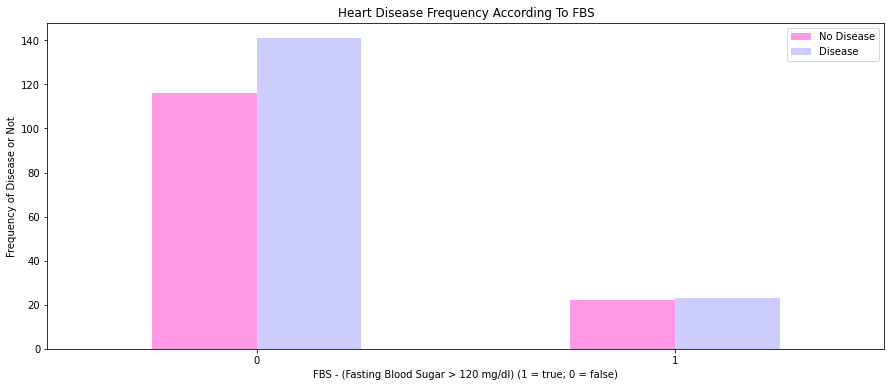

In [16]:
pd.crosstab(data.fbs,data.target).plot(kind="bar",figsize=(15,6),color=['#ff99e6','#ccccff' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["No Disease", "Disease"])
plt.ylabel('Frequency of Disease or Not')
# Save a figure
plt.savefig('fbs_and_target.png')
plt.show()

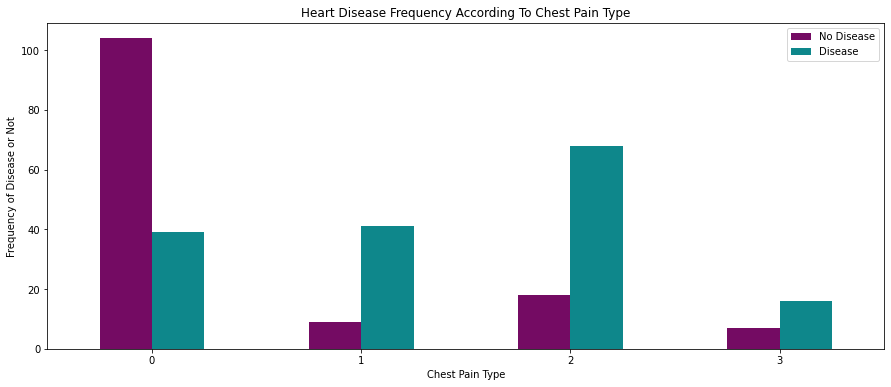

In [17]:
pd.crosstab(data.cp,data.target).plot(kind="bar",figsize=(15,6),color=['#740b63', '#0e878b'])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.legend(["No Disease", "Disease"])
plt.ylabel('Frequency of Disease or Not')
# Save a figure
plt.savefig('sp_and_target.png')
plt.show()

(241, 14)  is the shape of Training Data Features
(241,)  is the shape of Training Data Lables
(61, 14)  is the shape of Testing Data Features
(61,)  is the shape of Testing Data Lables


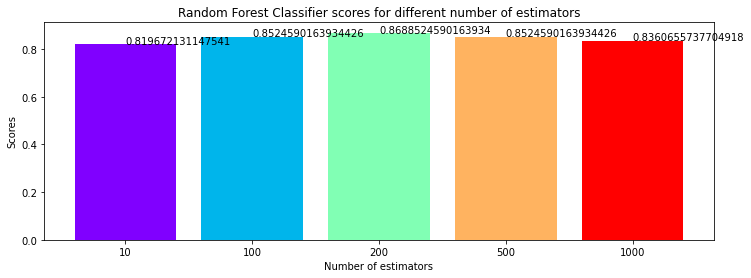

Accuracy score given for test data: 0.8360655737704918
Classification Report : 

                   precision    recall  f1-score   support

   Heart Disease       0.78      0.89      0.83        28
No Heart Disease       0.90      0.79      0.84        33

        accuracy                           0.84        61
       macro avg       0.84      0.84      0.84        61
    weighted avg       0.84      0.84      0.84        61



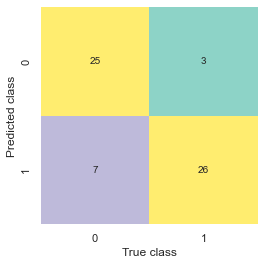

Variable: cp                   Importance: 0.13
Variable: oldpeak              Importance: 0.12
Variable: thalach              Importance: 0.11
Variable: thal                 Importance: 0.1
Variable: ca                   Importance: 0.09
Variable: Unnamed: 0           Importance: 0.08
Variable: age                  Importance: 0.08
Variable: chol                 Importance: 0.07
Variable: trestbps             Importance: 0.06
Variable: exang                Importance: 0.05
Variable: slope                Importance: 0.05
Variable: sex                  Importance: 0.03
Variable: restecg              Importance: 0.02
Variable: fbs                  Importance: 0.01


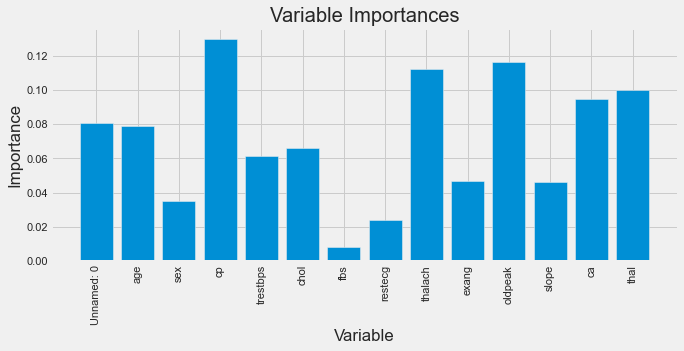

C:\Users\ASUS\AppData\Local\Temp/ipykernel_9692/3250770195.py:129: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data.hist(ax=ax)


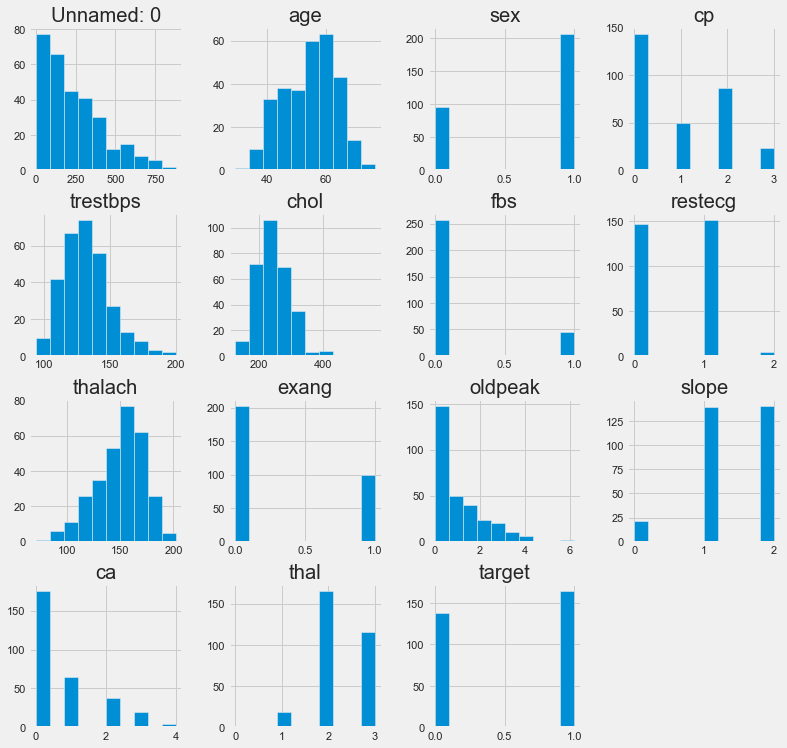

In [18]:
# LabelEncoder use to converting the labels into the numeric form so as to convert it into the machine-readable form,
# which they contain only values between 0 and no_classes-1. 
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Get the copy of original data set as a training data set
data_td = data.copy() 
for i in data.columns:
    data_td[i]=labelencoder.fit_transform(data[i])
# Drop the 'target' column which represents the feature which going to predict 
Xax = data_td.drop(['target'], axis=1)
# assign 'Outcome' column to Y variable
Yay = data_td['target']
data_feature_list = list(Xax.columns)

# Dataset separated to 80/20 for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Xax, Yay, test_size=0.2, random_state = 42)
print(X_train.shape,' is the shape of Training Data Features')
print(Y_train.shape,' is the shape of Training Data Lables')
print(X_test.shape,' is the shape of Testing Data Features')
print(Y_test.shape,' is the shape of Testing Data Lables')

# Impliment the Random Forest Classifier Algorithm
from sklearn.ensemble import RandomForestClassifier
rf_scores = []
# Calculate test data scores over 10, 100, 200, 500 and 1000 trees.
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=i, random_state = 42)
    rf_classifier.fit(X_train, Y_train)
    rf_scores.append(rf_classifier.score(X_test, Y_test))
# The predictions using test data
Y_pred = rf_classifier.predict(X_test)
Y_pred
# create charts using pyplot, and color them with
from matplotlib.cm import rainbow

colors = rainbow(np.linspace(0, 1, len(estimators)))
# Create a figure
plt.figure(figsize=(12,4))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')
# Save a figure
plt.savefig('rfc_scor_over_estimators.png')
plt.show()

# The predictions using test dataset
Y_pred = rf_classifier.predict(X_test)
Y_pred
# Get the accuracy score for dataset
accuracy_score=sm.accuracy_score(Y_test, Y_pred)
print('Accuracy score given for test data:',str(accuracy_score))
#Generate classification report based on the predicted values 
 
from sklearn import metrics
print("Classification Report : \n\n", metrics.classification_report(Y_pred, Y_test, target_names = ["Heart Disease","No Heart Disease"]))
# Generates the confusion matrix based on the test data values
from sklearn.metrics import confusion_matrix 
import seaborn as sns; 
sns.set() 
get_ipython().run_line_magic('matplotlib', 'inline') 
 
mat = confusion_matrix(Y_test, Y_pred) 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='Set3',) 
plt.xlabel('True class') 
plt.ylabel('Predicted class')
# Save a figure
plt.savefig('metrix_heatmap.png')
plt.show()
# Feature importances as numeric
importances = list(rf_classifier.feature_importances_)

# Tuples list with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(data_feature_list, importances)]

# Sort the feature importances  
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print the dataset importances and feature  
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
# Plotted Feature importance generates
get_ipython().run_line_magic('matplotlib', 'inline') 
plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))
# Create a figure
plt.figure(figsize=(10,4))
plt.bar(x_values, importances, orientation = 'vertical') 

plt.xticks(x_values, data_feature_list, rotation='vertical') 
plt.ylabel('Importance')
plt.xlabel('Variable') 
plt.title('Variable Importances')
# Save a figure
plt.savefig('feature_importances.png')
plt.show()

# Decision tree generation
# Load libraries
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
tree = rf_classifier.estimators_[1] 

#export_graphviz(tree, out_file=dot_data,feature_names = data_feature_list,rounded = True, precision = 1) 
 
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Show graph
#Image(graph.create_png())
# Create PDF
#graph.write_pdf("decision_tree.pdf")
# Create PNG
#graph.write_png("decision_tree.png")
# Implimentation of the Ada Boost Classifier 
from sklearn.ensemble import AdaBoostClassifier
rf_classifier = AdaBoostClassifier(n_estimators=1000)
rf_classifier.fit(X_train, Y_train)
predictions = rf_classifier.predict(X_test)
(Y_test, predictions)
fig = plt.figure(figsize = (12,12))
ax = fig.gca()
data.hist(ax=ax)
# Save a figure
plt.savefig('data_hist.png')
plt.show()

In [19]:
import pandas as pd
file_name_output = "my_file_without_dupes.csv"
data = pd.read_csv("C:/Users/ASUS/Desktop/ML Assignment 2/heart.csv")

# Notes:
# - the `subset=None` means that every column is used 
#    to determine if two rows are different; to change that specify
#    the columns as an array
# - the `inplace=True` means that the data structure is changed and
#   the duplicate rows are gone  
data.drop_duplicates(subset=None, inplace=True)

# Write the results to a different file
data.to_csv(file_name_output)